In [1]:
import cv2
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def rotate_image(image, angle):
    """Rotate an image by the given angle in degrees."""
    # Get image dimensions
    height, width = image.shape[:2]
    
    # Calculate the rotation matrix
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # Calculate new image dimensions
    abs_cos = abs(rotation_matrix[0, 0])
    abs_sin = abs(rotation_matrix[0, 1])
    new_width = int(height * abs_sin + width * abs_cos)
    new_height = int(height * abs_cos + width * abs_sin)
    
    # Adjust rotation matrix for the new dimensions
    rotation_matrix[0, 2] += new_width / 2 - center[0]
    rotation_matrix[1, 2] += new_height / 2 - center[1]
    
    # Perform the rotation
    rotated = cv2.warpAffine(image, rotation_matrix, (new_width, new_height), flags=cv2.INTER_LINEAR)
    
    # Resize back to original dimensions to maintain consistency
    resized = cv2.resize(rotated, (width, height))
    
    return resized

def augment_images(input_folder, output_folder, angle_step=5):
    """
    Augment images in the input folder by rotating them at various angles.
    
    Args:
        input_folder (str): Path to folder containing input images
        output_folder (str): Path to folder where augmented images will be saved
        angle_step (int): Angle increment for rotation in degrees
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Determine which images to process
    image_files = [f for f in os.listdir(input_folder) 
                   if os.path.isfile(os.path.join(input_folder, f)) and 
                   f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    if not image_files:
        print(f"No image files found in {input_folder}")
        return
    
    print(f"Found {len(image_files)} images in {input_folder}")
    
    # Calculate how many augmented images will be created
    num_angles = 360 // angle_step
    total_images = len(image_files) * num_angles
    print(f"Will create approximately {total_images} augmented images")
    
    # Create progress bar
    pbar = tqdm(total=total_images, desc="Augmenting images")
    
    # Keep track of created images
    created_count = 0
    
    # Process each image
    for img_file in image_files:
        # Load the image
        img_path = os.path.join(input_folder, img_file)
        img = cv2.imread(img_path)
        
        if img is None:
            print(f"Warning: Could not read image {img_path}")
            continue
        
        # Extract filename without extension
        filename = os.path.splitext(img_file)[0]
        
        # Create rotated versions
        for angle in range(0, 360, angle_step):
            # Skip 0 degrees (original image)
            if angle == 0:
                # Copy the original image
                output_path = os.path.join(output_folder, f"{filename}_original.png")
                cv2.imwrite(output_path, img)
                created_count += 1
                pbar.update(1)
                continue
                
            # Rotate image
            rotated = rotate_image(img, angle)
            
            # Save rotated image
            output_path = os.path.join(output_folder, f"{filename}_rot{angle:03d}.png")
            cv2.imwrite(output_path, rotated)
            
            created_count += 1
            pbar.update(1)
    
    pbar.close()
    print(f"Created {created_count} augmented images in {output_folder}")
    
    # Show a few examples
    if len(image_files) > 0:
        sample_img = cv2.imread(os.path.join(input_folder, image_files[0]))
        sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(15, 10))
        plt.subplot(3, 3, 1)
        plt.imshow(sample_img)
        plt.title("Original")
        plt.axis('off')
        
        for i, angle in enumerate([45, 90, 135, 180, 225, 270, 315], 2):
            rotated = rotate_image(sample_img, angle)
            # If image is grayscale, don't convert color
            if len(rotated.shape) == 3:
                rotated = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)
            plt.subplot(3, 3, i)
            plt.imshow(rotated)
            plt.title(f"Rotated {angle}°")
            plt.axis('off')
            
        plt.tight_layout()
        plt.show()

Found 311 images in clear
Will create approximately 22392 augmented images


Augmenting images:   0%|          | 0/22392 [00:00<?, ?it/s]

Created 22392 augmented images in aug_clear


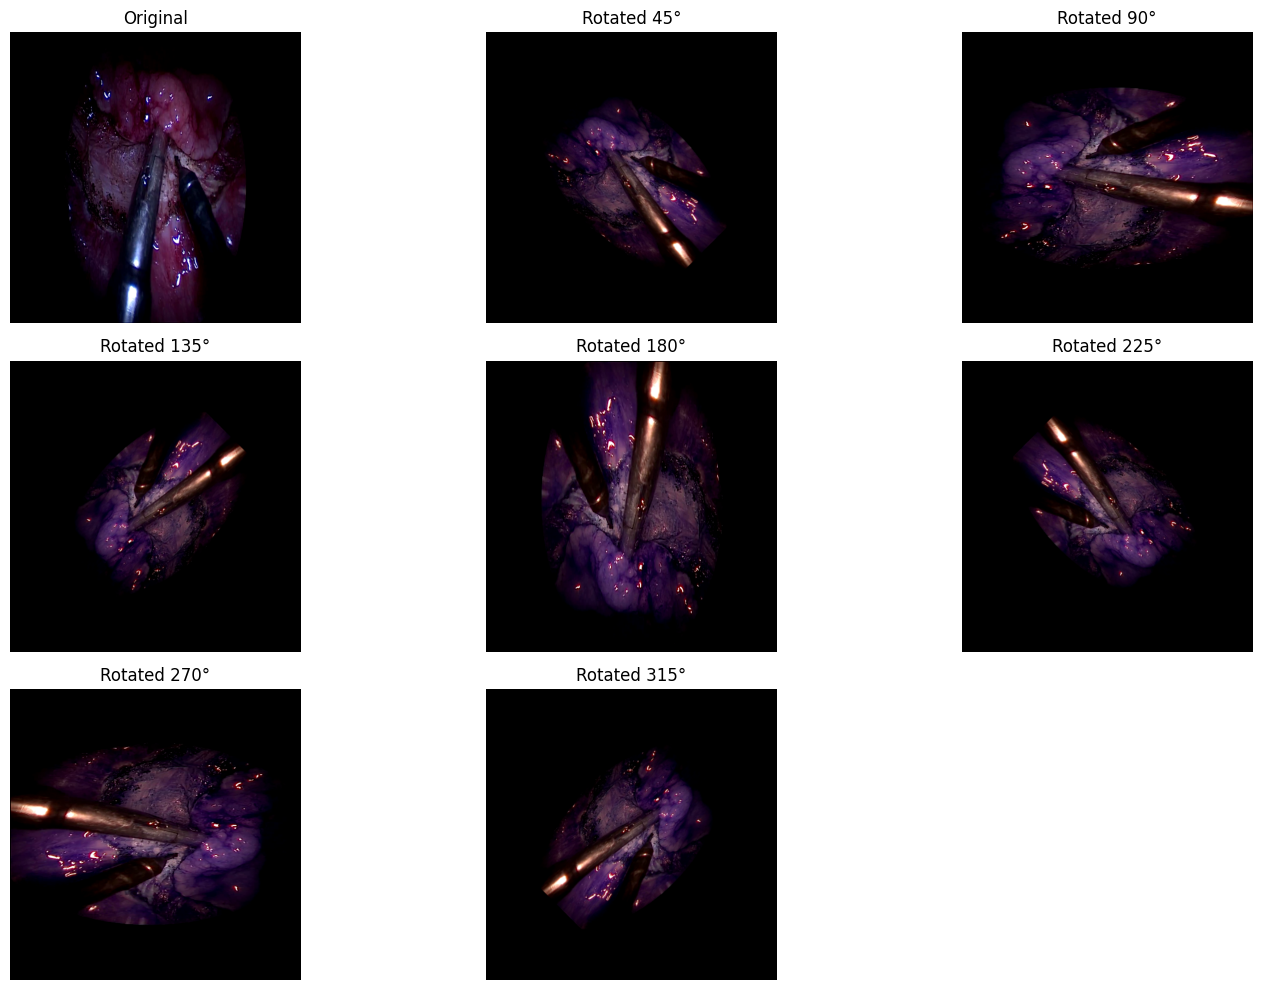

In [4]:
augment_images(
    input_folder="clear",      # Your folder with original clear images
    output_folder="aug_clear", # Where to save augmented clear images
    angle_step=5               # Rotation angle step in degrees
)

Found 300 images in blurry
Will create approximately 21600 augmented images


Augmenting images:   0%|          | 0/21600 [00:00<?, ?it/s]

Created 21600 augmented images in aug_blurry


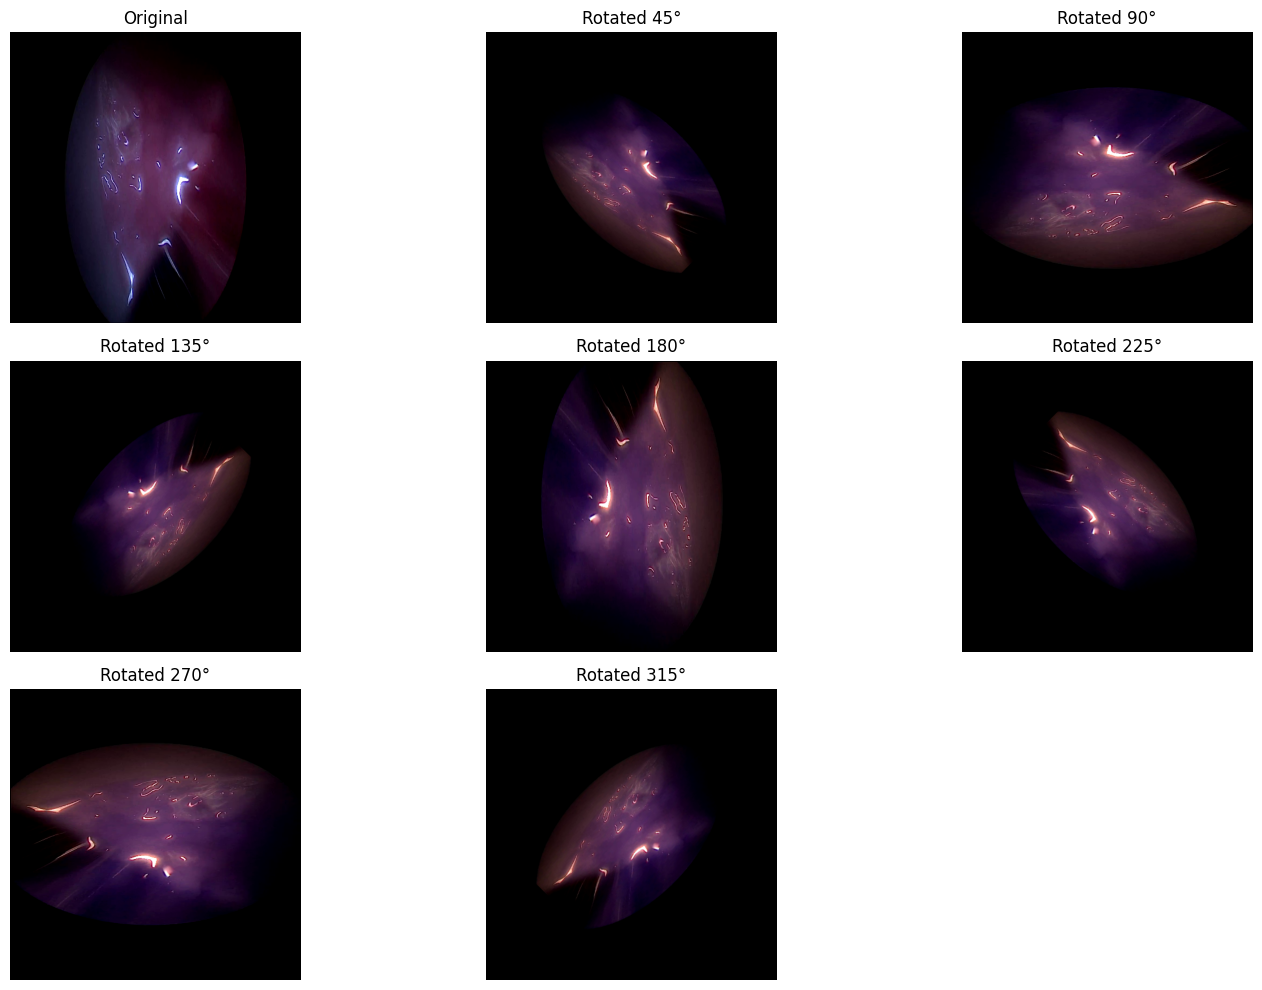

In [6]:
augment_images(
    input_folder="blurry",      # Your folder with original blurry images
    output_folder="aug_blurry", # Where to save augmented blurry images
    angle_step=5                # Rotation angle step in degrees
)